In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv(r"C:\Code\ML-Tobias-Oberg-AI24\data\Advertising.csv", index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


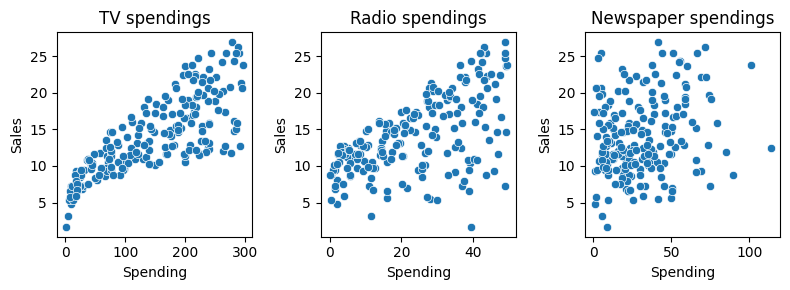

In [4]:
import matplotlib.pyplot as plt

number_features = df.shape[1] -1
fig, ax = plt.subplots(1, number_features, figsize=(8,3), dpi=100)

for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(data=df, x= feature, y="Sales", ax=ax[i])
    ax[i].set(xlabel="Spending", title=f"{feature} spendings")

fig.tight_layout()

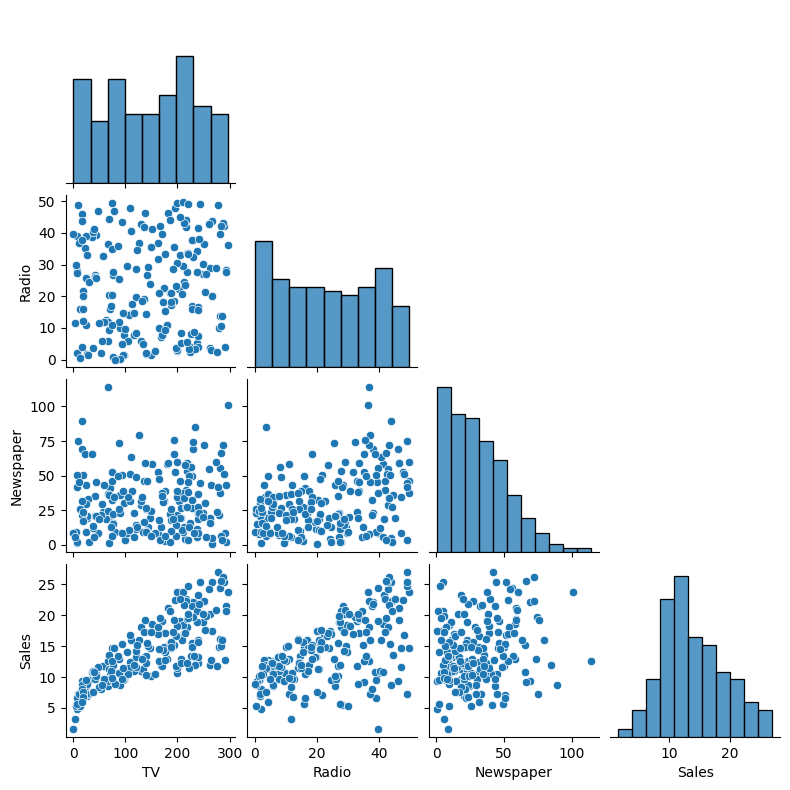

In [5]:
ax = sns.pairplot(df, corner=True, height=2)

Intercept: Beta0: 7.0326
Intercept: Beta1: 0.0475


[Text(0.5, 1.0, 'Tv advertisement linear regression'),
 Text(0.5, 0, 'Thousand dollars'),
 Text(0, 0.5, 'Sales thousand units')]

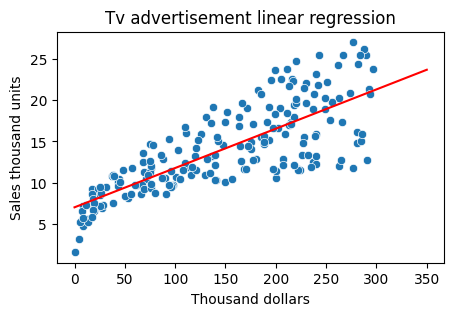

In [6]:
import numpy as np
X, y = df["TV"], df["Sales"]

beta_1,beta_0 = np.polyfit(X,y, deg=1)

y_hat = lambda x: beta_0 + beta_1*x

print(f"Intercept: Beta0: {beta_0:.4f}")
print(f"Intercept: Beta1: {beta_1:.4f}")


spend = np.linspace(0,350)
fig, ax = plt.figure(figsize=(5,3), dpi=100), plt.axes()

sns.scatterplot(data=df, x="TV", y="Sales")
sns.lineplot(x=spend, y=y_hat(spend), color="red")

ax.set(title="Tv advertisement linear regression", 
       xlabel= "Thousand dollars",
       ylabel="Sales thousand units")

<Axes: xlabel='TV', ylabel='Sales'>

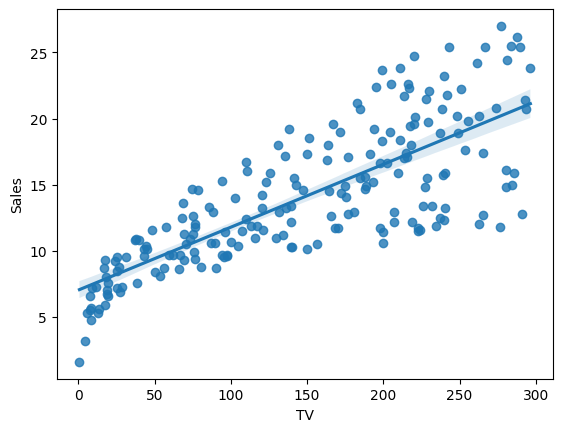

In [7]:
sns.regplot(x=X,y=y)

In [8]:
# Multiple linear regression
from sklearn.linear_model import LinearRegression

X, y = df.drop("Sales", axis="columns"), df["Sales"]
X.insert(0 ,"Intercept", 1)

model = LinearRegression()
beta = model.fit(X,y)

# beta.score(X,y) = R^2

test_sample = [1,230.1,37.8,69.2]

y_hat = model.predict([test_sample])

print(f"Tv: $230.1k, Radio: $37.8, Newspaper: $69.2 predicts {y_hat[0]:.1f} thousand units")

Tv: $230.1k, Radio: $37.8, Newspaper: $69.2 predicts 20.5 thousand units


c:\Code\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [9]:
train_fraction = int(len(df)*0.7)

train = df.sample(n=train_fraction, random_state=42, replace=False)
val = df.drop(train.index)

X_train, y_train = train.drop("Sales", axis="columns"), train["Sales"]
X_val, y_val = val.drop("Sales", axis="columns"), val["Sales"]

X_train.insert(0, "Intercept", 1)
X_val.insert(0, "Intercept", 1)


for dataset in ["X_train", "X_val", "y_train", "y_val"]:
    print(f"Shape of {dataset}: {eval(dataset).shape}")




Shape of X_train: (140, 4)
Shape of X_val: (60, 4)
Shape of y_train: (140,)
Shape of y_val: (60,)


In [10]:
model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [11]:
n = len(y_val)
y_hat = model.predict(X_val)

MAE = np.divide(1, n) * np.sum(np.abs(y_val - y_hat))
MSE = np.divide(1, n) * np.sum(np.square(y_val - y_hat))
RMSE = np.sqrt(MSE)
RSE = np.sqrt(np.divide(1, n-X_val.shape[1]-2) * np.sum(np.square(y_val - y_hat)))

MAE,MSE,RMSE,RSE

(1.3244490959726527,
 3.5404256182385185,
 1.8816018755939097,
 1.9833825255071809)